# Dictionaries

Python dictionaries are fundamental building blocks for the Python programming language. They are essentially finite maps in the mathematical sense. We give a treatment following &sect; 6.2 of
* *A Primer on Scientific Programming with Python* by Hans Petter Langtangen, 2nd edition.

Dictionaries are also briefly described in the [Python Tutorial](https://docs.python.org/3/tutorial/datastructures.html#dictionaries).

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import math as m
from mpmath import mp, iv

## Example of a simple dictionary

In Python curly brackets denote a dictionary. Here is a simple one:

In [2]:
d = {2: 3.14, "dog": "cat", 2.5: "bird"}
d

{2: 3.14, 'dog': 'cat', 2.5: 'bird'}

A dictionary represents a finite mapping, meaning there are accepted inputs in a finite set and each input has an output. For example, the notation `2: 3.14` in the curly brackets indicates that `2` is mapped by the dictionary to `3.14`. We can apply the map using square brackets:

In [3]:
d[2]

3.14

In [4]:
d[2.5]

'bird'

In [5]:
d["dog"]

'cat'

Note that the inputs and outputs can be nearly any object known to Python and the objects can be freely mixed. (Later we will see that the inputs must be hashable.)

## Iterating though a dictionary

The accepted inputs of a dictionary are called the dictionary's *keys*.  You can iterate through the list of keys as follows:

In [6]:
for key in d:
    print(key)

2
dog
2.5


If we want to access the image of `key` we can use `d[key]` as above so we can do:

In [7]:
for key in d:
    print("{} mapsto {}".format(key, d[key]))

2 mapsto 3.14
dog mapsto cat
2.5 mapsto bird


An alternate way to loop through the same information is demonstrated below:

In [8]:
for key, value in d.items():
    print("{} mapsto {}".format(key, value))

2 mapsto 3.14
dog mapsto cat
2.5 mapsto bird


## Improvement over lists

Often data is more naturally presented in terms of dictionaries than lists or tuples (the main other data collection types we have used).

For example, the following two lists represent times (in years) at which measurements of atmospheric $CO_2$ were made and the actual measurements (in ppm).

In [9]:
measurement_time = [ 2019.042, 2019.125, 2019.208, 2019.292, 
                     2019.375, 2019.458, 2019.542, 2019.625, 
                     2019.708, 2019.792, 2019.875, 2019.958 ]
measurement = [ 410.83, 411.75, 411.97, 413.32, 414.66, 413.92,
                411.77, 409.94, 408.54, 408.53, 410.27, 411.76 ]

Here `measurement[i]` was made at `measurement_time[i]`. But it is awkward to keep this data separate, and we are forced to use an index `i` which is not so relevant to us.

The same information can be stored in a dictionary as follows and makes the relationship clear.

In [10]:
data = { 2019.042: 410.83,
         2019.125: 411.75,
         2019.208: 411.97,
         2019.292: 413.32,
         2019.375: 414.66,
         2019.458: 413.92,
         2019.542: 411.77,
         2019.625: 409.94,
         2019.708: 408.54,
         2019.792: 408.53,
         2019.875: 410.27,
         2019.958: 411.76 }

You can get a list of keys with `d.keys()` and the corresponding list of values with `d.values()`. (Really the objects returned are not lists, but they behave like them.) So, you don't really lose any flexibility by using a dictionary.

For example, if you want to plot the `data` above, you can use the following:

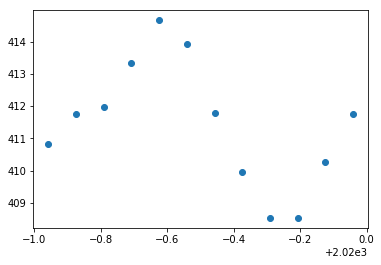

In [11]:
plt.plot(data.keys(), data.values(), "o")

## Modifying dictionaries

Recall the dictionary `d` is as below:

In [12]:
d

{2: 3.14, 'dog': 'cat', 2.5: 'bird'}

Perhaps we want to map `4` to `'frog'`. We can do that with:

In [13]:
d[4] = 'frog'
d

{2: 3.14, 'dog': 'cat', 2.5: 'bird', 4: 'frog'}

This added a new key and a new value to our dictionary.

We can also modify an existing value. That `3.14` value seems out of place. To fix it we can do:

In [14]:
d[2] = 'aardvark'
d

{2: 'aardvark', 'dog': 'cat', 2.5: 'bird', 4: 'frog'}

The `'dog'` key also seems out of place. It can be removed with:

In [15]:
del d['dog']
d

{2: 'aardvark', 2.5: 'bird', 4: 'frog'}

## Building dictionaries from scratch

You can build an empty dictionary with the command:

In [16]:
squares = {}

So one way to build a dictionary is to start with an empty dictionary and then add key-value pairs one at a time. 

In [17]:
for n in range(-2,5):
    squares[n] = n**2
squares

{-2: 4, -1: 1, 0: 0, 1: 1, 2: 4, 3: 9, 4: 16}

## Checking keys

You can check if an object is a key in a dictionary using the `in` keyword. For example:

In [18]:
2 in d

True

In [19]:
'squid' in d

False

Because `'squid'` is not in the dictionary, an exception will occur if you try to access `d['squid']`.

In [20]:
d['squid']

KeyError: 'squid'

You can then deal with the possibility you might use a bad key using a `try`-`except` block.

In [21]:
try:
    print("squid maps to {}".format( d['squid'] ))
except KeyError:
    print("I guess 'squid' is not a key!")

I guess 'squid' is not a key!


The `except` block gets run only if a `KeyError` occurs in the execution of the `try` block. So for example if we set `d['squid']` and then execute the same block we see different behavior:

In [22]:
d['squid'] = 14
try:
    print("squid maps to {}".format( d['squid'] ))
except KeyError:
    print("I guess 'squid' is not a key!")

squid maps to 14


## Making a copy

You can make a copy of a dictionary with:

In [23]:
d2 = d.copy()
d2

{2: 'aardvark', 2.5: 'bird', 4: 'frog', 'squid': 14}

This is useful because now you can make changes to the copy without chaing the original and vice versa. For example, changing `d2` so that `2.5` maps to `'salamander'` will not affect `d`.

In [28]:
d2[2.5] = 'salamander'
print("d = {}".format(d))
print("d2 = {}".format(d2))

d = {2: 'aardvark', 2.5: 'salamander', 4: 'frog', 'squid': 14, 'list': ['item0']}
d2 = {2: 'aardvark', 2.5: 'bird', 4: 'frog', 'squid': 14, 'list': ['item0']}


d.copy?

The `.copy()` method returns a *shallow copy*, meaning that the command `d2 = d.copy()` is equivalent to the following:

In [25]:
d2 = {}
for key,value in d.items():
    d2[key] = value
d2

{2: 'aardvark', 2.5: 'bird', 4: 'frog', 'squid': 14}

The copy is *shallow* because the values are identical in the two dictionaries. So for instance if a value is a list and that list changes, then it will change in both dictionaries. For example:

In [26]:
d['list'] = []
d2 = d.copy()
print("d = {}".format(d))
print("d2 = {}".format(d2))

d = {2: 'aardvark', 2.5: 'bird', 4: 'frog', 'squid': 14, 'list': []}
d2 = {2: 'aardvark', 2.5: 'bird', 4: 'frog', 'squid': 14, 'list': []}


In [27]:
d['list'].append("item0")
print("d = {}".format(d))
print("d2 = {}".format(d2))

d = {2: 'aardvark', 2.5: 'bird', 4: 'frog', 'squid': 14, 'list': ['item0']}
d2 = {2: 'aardvark', 2.5: 'bird', 4: 'frog', 'squid': 14, 'list': ['item0']}


Note that the above examples make a subtle distinction:
* The command `d2[2.5] = 'salamander'` assigns a new object (`'salamander'`) to `2.5`.
* The command `d['list'].append("item0")` makes a change to an existing value.
The first type of change does not propagate to a copy, but the second does. Actually the second statement does not change `d` or `d2`. (The dictionaries just store a pointer to an object not the object itself.)

## Extras

### How dictionaries work

Keys in a dictionary are distinguished by their *hash*, an integer associated to an object that is *immutable* (does not change). You can access the hash of an object with `hash(obj)`.

In [38]:
hash(2)

2

In [39]:
hash(2.5)

1152921504606846978

In [40]:
hash("frog")

5002598669564276501

The hash of two objects need to be the same if the two objects are equal. So for example:

In [41]:
hash("fr" + "og") == hash("frog")

True

In [6]:
hash(1) == hash(1.0)

True

A python dictionary is implemented as a [hash table](https://en.wikipedia.org/wiki/Hash_table) and is generally very fast unless there are *hash collisions* (where multiple keys have the same hash value). 

### Internal use in Python

Python uses dictionaries to store all the variables you use in your code. Variables are stored using their variable name as a string mapping to the variable's value.

You can access these variables in an alternate way through the [`locals()`](https://docs.python.org/3/library/functions.html#locals) and [`globals()`](https://docs.python.org/3/library/functions.html#globals) functions. See the [documentation](https://docs.python.org/3/library/functions.html) for more detail.

So we can access our dictionary `d` built above using the command:

In [42]:
locals()["d"]

{2: 'aardvark', 2.5: 'salamander', 4: 'frog', 'squid': 14, 'list': ['item0']}

### Sets

Sets are very similar to dictionaries but store only keys instead of key-value pairs. They are useful for keeping track of objects in case you want to eliminate duplicates. For example:

In [44]:
s = { 2, 3, 4, 2+2, 5-3, 1+1}
s

{2, 3, 4}

You can read more about sets in the [Python documentation](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset).